# Preconscious Augmentation

This script trains the classifier for a brain-computer interface that controls electrical muscle stimulation in the preconscious augmentation experiment.
The functions used to build the feature vectors are the same that are used for the online application and are found in 'bci_funcs'

A two class linear discriminant model is fitted to idle and pre-movement EEG training data. The model and a channel selection is saved.


In [46]:
pID = 2
pID = 'sub-0' + "%02d" % (pID)

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import accuracy_score

import pickle
import scipy.io
from bci_funcs import windowed_mean, base_correct, drop_baseline
import mne

#path = '/Users/lukasgehrke/Documents/publications/2021-fastReach/data/study/eeglab2python/'
# path = 'P:\\Lukas_Gehrke\\2021-fastReach\\data\\study\\eeglab2python\\'
path = '/Volumes/projects/Lukas_Gehrke/2021-fastReach/data/study/eeglab2python/'

# Load Data

In [65]:
pre_move = scipy.io.loadmat(path+pID+'/pre_move.mat')
idle = scipy.io.loadmat(path+pID+'/idle.mat')
chans = np.array(pd.read_csv(path+pID+'/sel_chans.csv', header=None)).flatten()
chans = chans - 1 # Matlab to python indexing

filename = path+pID+'/chans_'+pID+'_eeg.sav'
pickle.dump(chans, open(filename, 'wb'))

windows = 10
baseline_ix = 1

idle = idle['idle'][chans,:,:]
pre_move = pre_move['pre_move'][chans,:,:]

tmp_idle_means = np.zeros((idle.shape[2], len(chans), windows))
tmp_pre_move_means = np.zeros((pre_move.shape[2], len(chans), windows))

# idle_means = np.zeros((idle.shape[2], idle.shape[0] * (windows-baseline_ix)))
# pre_move_means = np.zeros((pre_move.shape[2], pre_move.shape[0] * (windows-baseline_ix)))
idle_means = np.zeros((idle.shape[2], idle.shape[0] * (windows)))
pre_move_means = np.zeros((pre_move.shape[2], pre_move.shape[0] * (windows)))

baseline = 250/10 # 100 ms baseline

for trial_ix in range(0, pre_move.shape[2]):
    tmp = base_correct(pre_move[:,:,trial_ix], baseline-1)
    tmp_pre_move_means[trial_ix,:,:] = windowed_mean(tmp, windows = windows)
    pre_move_means[trial_ix, :] = tmp_pre_move_means[trial_ix,:,:].flatten()

    # pre_move_means[trial_ix, :] = drop_baseline(tmp, baseline_ix).flatten()
    # pre_move_means[trial_ix, :] = tmp.flatten()

for trial_ix in range(0, idle.shape[2]):
    tmp = base_correct(idle[:,:,trial_ix], baseline-1)
    tmp_idle_means[trial_ix, :, :] = windowed_mean(tmp, windows = windows)
    idle_means[trial_ix, :] = tmp_idle_means[trial_ix,:,:].flatten()

    # idle_means[trial_ix, :] = drop_baseline(tmp, baseline_ix).flatten()
    # idle_means[trial_ix, :] = tmp.flatten()

data = np.concatenate((pre_move_means, idle_means), axis = 0)

In [66]:
pre_move_class = np.ones((pre_move_means.shape[0], 1))
idle_class = np.zeros((idle_means.shape[0], 1))
classes = np.concatenate((pre_move_class, idle_class)).ravel()

# Plotting ERPs and Scalp Maps

In [ ]:
# save plots individual participants
chans_names = pd.read_csv(path+pID+'/sel_chans_names.csv')

# erp
for c_ix in range(0, len(chans)):
        
    idle_c = tmp_pre_move_means[:,c_ix,:]
    pre_move_c = tmp_idle_means[:,c_ix,:]
    idle_c = pd.DataFrame(idle_c)
    pre_move_c = pd.DataFrame(pre_move_c)

    condition = pd.DataFrame(classes, columns=['class']).astype('string')
    condition['class'].replace({'0.0': 'idle', '1.0': 'pre movement'}, inplace=True)

    erp = pd.concat([pre_move_c, idle_c], axis=0).reset_index(drop=True)
    erp_class_cz = pd.concat([condition['class'], erp], axis=1)

    with sns.plotting_context('paper', font_scale = 1.8):
        fig, ax = plt.subplots(1, 1, figsize=(9,5))
        fig.patch.set_alpha(1)
        sns.despine() #bottom=True, left=True 

        data_long = pd.melt(erp_class_cz, id_vars='class', var_name='timepoint', value_name='µV', col_level=None, ignore_index=True)

        # adjust time axis
        # data_long['timepoint'] = (((1/250) * (data_long["timepoint"].astype(int)))*1000) - 1000

        # plot
        ax = sns.lineplot(data = data_long, x = 'timepoint', y = 'µV', hue = 'class')
        ax.set(xlabel='Time (ms)', ylabel='µV', title=chans_names.Var1[chans[c_ix]])

        fig.savefig(path + pID + '/erp/feats_' + chans_names.Var1[chans[c_ix]] + '.png', format='png', transparent=False, bbox_inches='tight', dpi=300)
        fig.savefig(path + pID + '/erp/feats_' + chans_names.Var1[chans[c_ix]] + '.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

ValueError: Info (64) and data (250) must have same number of channels.

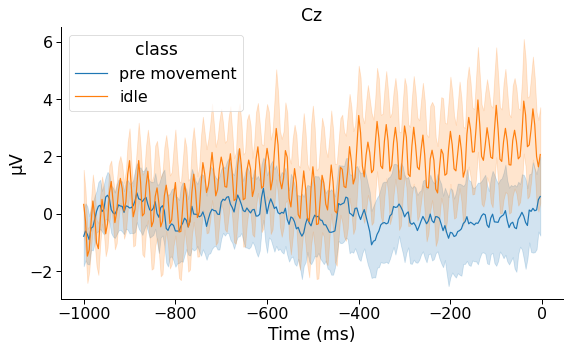

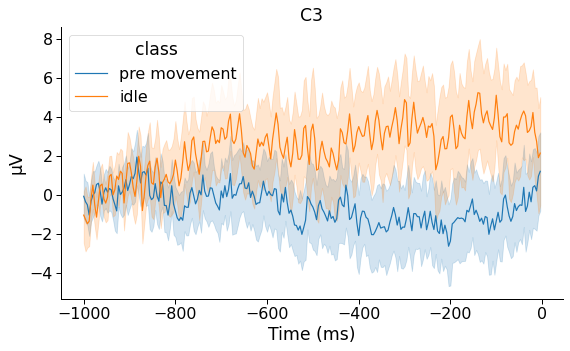

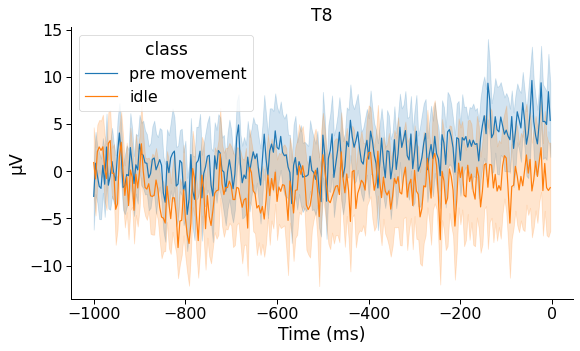

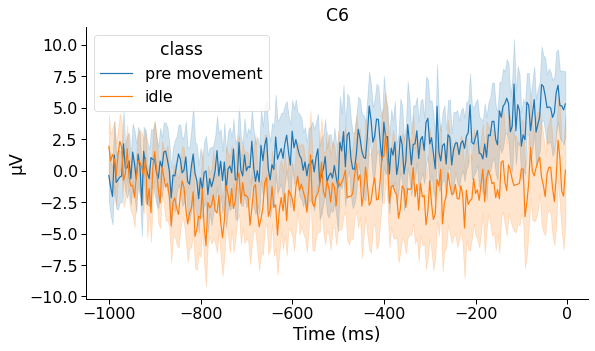

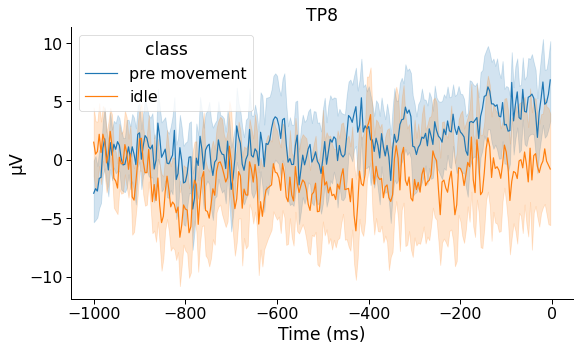

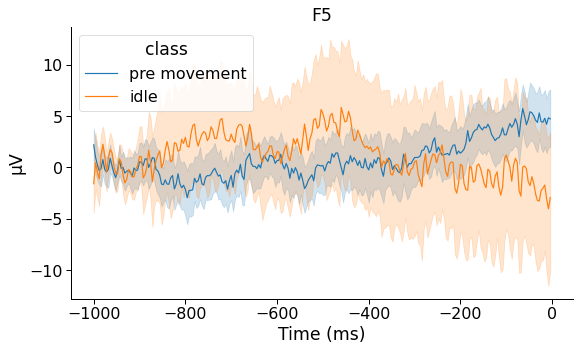

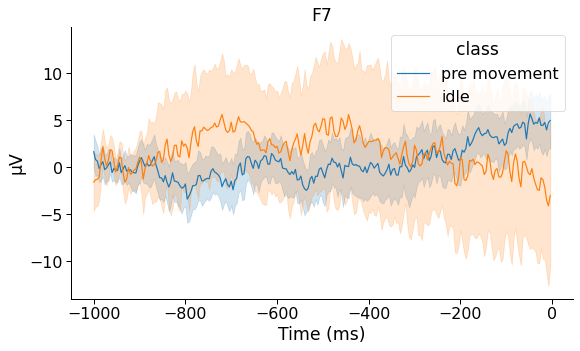

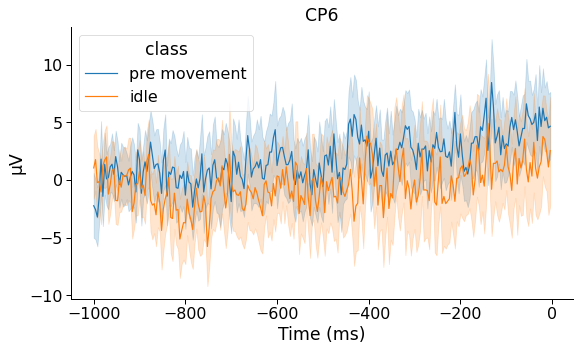

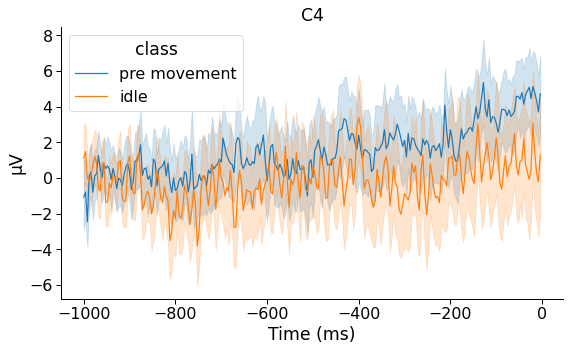

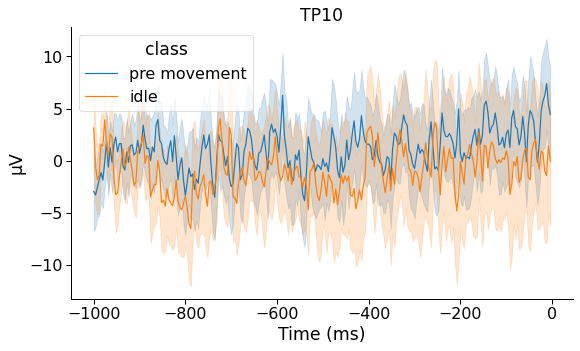

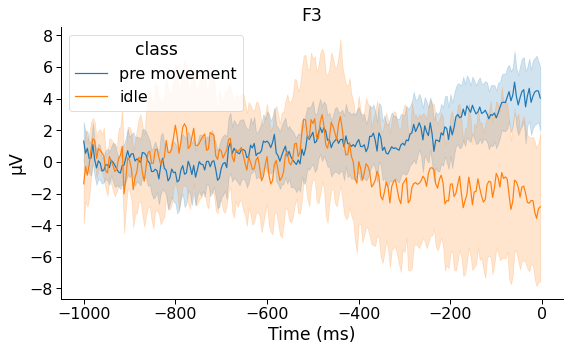

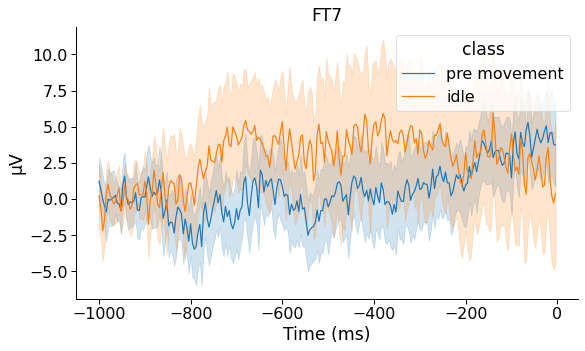

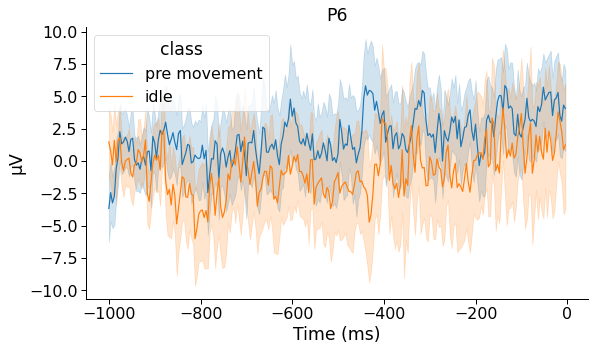

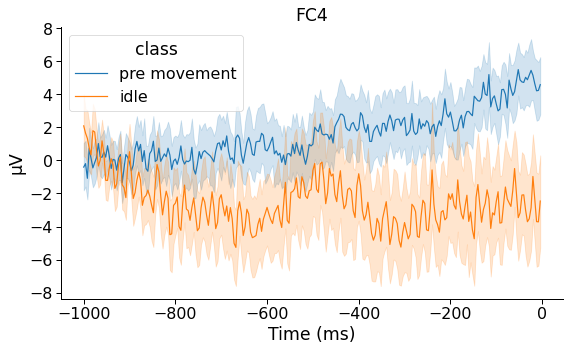

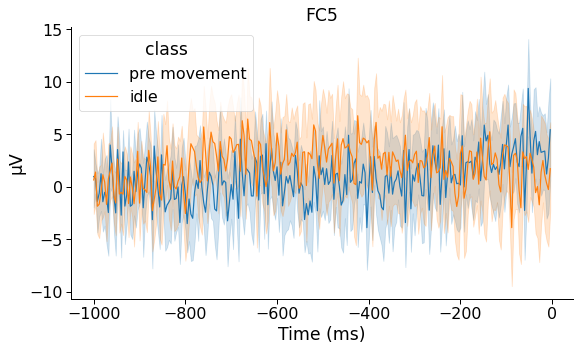

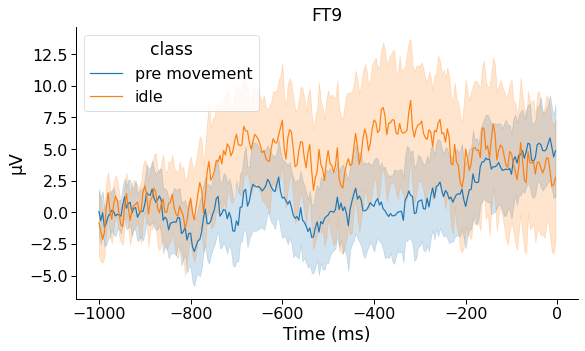

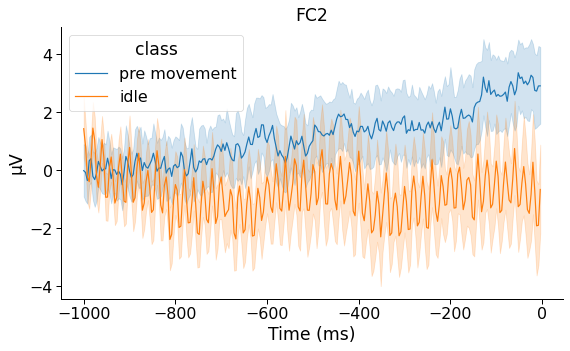

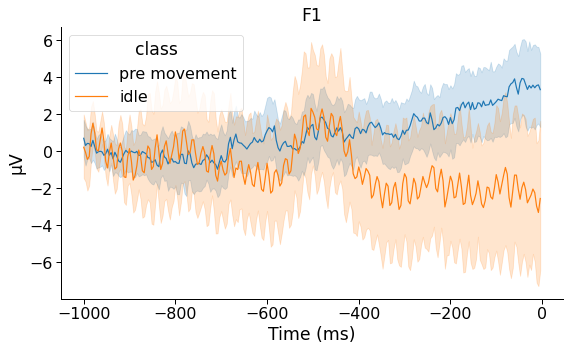

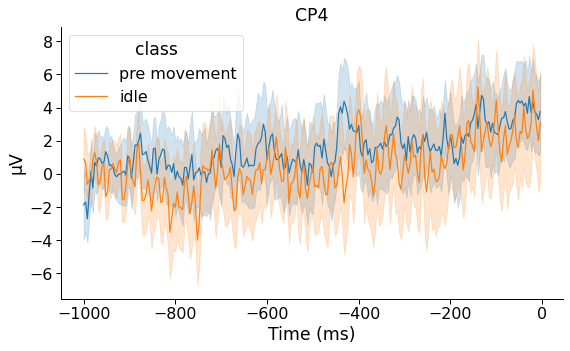

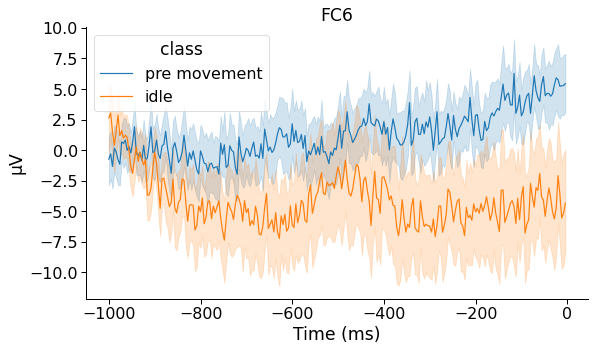

In [8]:
# save plots individual participants
chans_names = pd.read_csv(path+pID+'/sel_chans_names.csv')

# erp
for c_ix in range(0, len(chans)):
        
    idle_c = idle[c_ix,:,:] - np.mean(idle[c_ix,:24,:], axis = 0)
    pre_move_c = pre_move[c_ix,:,:] - np.mean(pre_move[c_ix,:24,:], axis = 0)
    idle_c = pd.DataFrame(idle_c.T)
    pre_move_c = pd.DataFrame(pre_move_c.T)

    condition = pd.DataFrame(classes, columns=['class']).astype('string')
    condition['class'].replace({'0.0': 'idle', '1.0': 'pre movement'}, inplace=True)

    erp = pd.concat([pre_move_c, idle_c], axis=0).reset_index(drop=True)
    erp_class_cz = pd.concat([condition['class'], erp], axis=1)

    with sns.plotting_context('paper', font_scale = 1.8):
        fig, ax = plt.subplots(1, 1, figsize=(9,5))
        fig.patch.set_alpha(1)
        sns.despine() #bottom=True, left=True 

        data_long = pd.melt(erp_class_cz, id_vars='class', var_name='timepoint', value_name='µV', col_level=None, ignore_index=True)

        # adjust time axis
        data_long['timepoint'] = (((1/250) * (data_long["timepoint"].astype(int)))*1000) - 1000

        # plot
        ax = sns.lineplot(data = data_long, x = 'timepoint', y = 'µV', hue = 'class')
        ax.set(xlabel='Time (ms)', ylabel='µV', title=chans_names.Var1[chans[c_ix]])

        fig.savefig(path + pID + '/erp/' + chans_names.Var1[chans[c_ix]] + '.png', format='png', transparent=False, bbox_inches='tight', dpi=300)
        fig.savefig(path + pID + '/erp/' + chans_names.Var1[chans[c_ix]] + '.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)

# features, for one channel?

# scalp topographies
channel_labels = chans_names['Var1'].values.tolist()
channel_labels = channel_labels[0:-1]
eog_ix = channel_labels.index('VEOG')
chans_types = ['eeg'] * channel_labels.__len__()
chans_types[eog_ix] = 'eog'
info = mne.create_info(channel_labels, ch_types=chans_types, sfreq=250)
easycap_montage = mne.channels.make_standard_montage('easycap-M1')

pre_move = scipy.io.loadmat(path+pID+'/pre_move.mat')
pre_move = pre_move['pre_move'].mean(axis=2)
pre_move = pre_move.T - pre_move[:,0:24].mean(axis=1)
# pre_move = pre_move[24:,:].T

raw = mne.EvokedArray(pre_move, info, tmin=-1)
raw.set_montage(easycap_montage)

raw.pick_channels(chans_names.Var1[chans].values.tolist())

times = np.arange(-1, 0, 0.1)
fig = raw.plot_topomap(times, ch_type='eeg', time_unit='s', show_names=False)
fig.savefig(path + pID + '/topomap_pre_move.png', format='png', transparent=False, bbox_inches='tight', dpi=300)
fig.savefig(path + pID + '/topomap_pre_move.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)

idle = scipy.io.loadmat(path+pID+'/idle.mat')
idle = idle['idle'].mean(axis=2)
idle = idle.T - idle[:,0:24].mean(axis=1)
# idle = idle[24:,:].T

raw = mne.EvokedArray(idle, info, tmin=-1)
raw.set_montage(easycap_montage)

raw.pick_channels(chans_names.Var1[chans].values.tolist())

times = np.arange(-1, 0, 0.1)
fig = raw.plot_topomap(times) #, [.1], ch_type='eeg', time_unit='s', show_names=False)
fig.savefig(path + pID + '/topomap_idle.png', format='png', transparent=False, bbox_inches='tight', dpi=300)
fig.savefig(path + pID + '/topomap_idle.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)

# Train, Save and Evaluate Classifier

In [17]:
# load experiment data that the classifier has not seen

pre_move_ems1 = scipy.io.loadmat(path+pID+'/pre_move_EMS1.mat')
idle_ems1 = scipy.io.loadmat(path+pID+'/idle_EMS1.mat')

idle_ems1 = idle_ems1['idle'][chans,:,:]
pre_move_ems1 = pre_move_ems1['pre_move'][chans,:,:]

pre_move_ems1_means = np.zeros((pre_move_ems1.shape[2], pre_move_ems1.shape[0] * (windows)))
pre_move_ems1_class = np.ones((pre_move_ems1_means.shape[0], 1))

for trial_ix in range(0, pre_move_ems1.shape[2]):
    # tmp = base_correct(windowed_mean(pre_move_ems1[:,:,trial_ix], windows = windows))
    # pre_move_ems1_means[trial_ix, :] = drop_baseline(tmp, baseline_ix).flatten()
    tmp = base_correct(pre_move_ems1[:,:,trial_ix], baseline-1)
    pre_move_ems1_means[trial_ix, :] = windowed_mean(tmp, windows = windows).flatten()

idle_ems1_means = np.zeros((idle_ems1.shape[2], idle_ems1.shape[0] * (windows)))
idle_ems1_class = np.zeros((idle_ems1_means.shape[0], 1))

for trial_ix in range(0, idle_ems1.shape[2]):
    # tmp = base_correct(windowed_mean(idle_ems1[:,:,trial_ix], windows = windows))
    # idle_ems1_means[trial_ix, :] = drop_baseline(tmp, baseline_ix).flatten()
    tmp = base_correct(idle_ems1[:,:,trial_ix], baseline-1)
    idle_ems1_means[trial_ix, :] = windowed_mean(tmp, windows = windows).flatten()

data_ems1 = np.concatenate((pre_move_ems1_means, idle_ems1_means), axis = 0)
classes_ems1 = np.concatenate((pre_move_ems1_class, idle_ems1_class)).ravel()

## LDA

In [51]:
clf = LDA(solver='eigen', shrinkage='auto')
clf.fit(data, classes)

kfolds = KFold(n_splits=5, random_state=1, shuffle=True) 
cv_results = cross_val_score(clf, data, classes, cv=kfolds)
print(cv_results.mean())
print(cv_results.std())

filename = path+pID+'/model_'+pID+'_eeg.sav'
pickle.dump(clf, open(filename, 'wb'))

0.7764492753623189
0.06092561256770983


## Plot Patterns and Filters

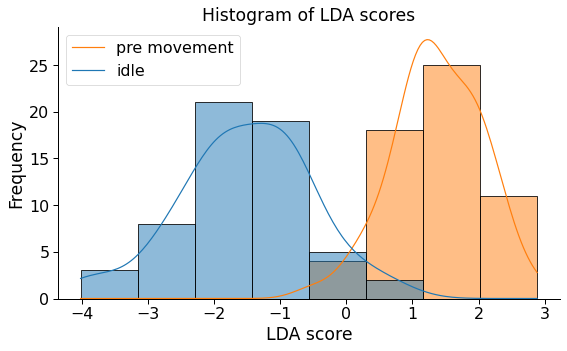

In [20]:
# histogram LDA scores
clf.fit(data, classes)

lda_scores = clf.transform(data)

df_to_plot = pd.DataFrame()
df_to_plot['scores'] = pd.DataFrame(lda_scores)
df_to_plot['classes'] = pd.DataFrame(classes)

with sns.plotting_context('paper', font_scale = 1.8):
    fig, ax = plt.subplots(1, 1, figsize=(9,5))
    fig.patch.set_alpha(1)
    sns.despine() #bottom=True, left=True 

    sns.histplot(data=df_to_plot, x='scores', hue=classes, kde=True)

    ax.set(xlabel='LDA score', ylabel='Frequency', title='Histogram of LDA scores')
    ax.legend(['pre movement', 'idle'])

0.38292935234699477

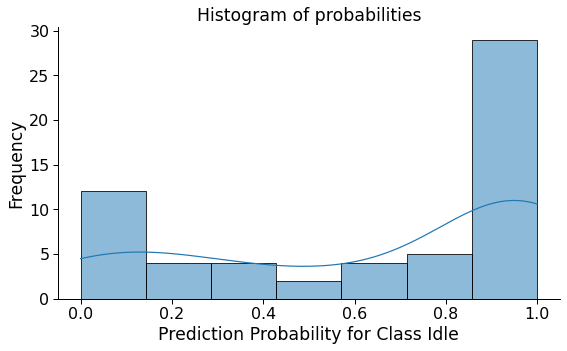

In [27]:
clf.fit(data, classes)
probs = np.round(clf.predict_proba(idle_ems1_means)[:,0],2)
# probs = np.round(clf.predict_proba(pre_move_ems1_means)[:,1],2)
# probs = np.round(clf.predict_proba(pre_move_means)[:,1],2)
# probs = np.round(clf.predict_proba(idle_means)[:,0],2)

with sns.plotting_context('paper', font_scale = 1.8):
    fig, ax = plt.subplots(1, 1, figsize=(9,5))
    fig.patch.set_alpha(1)
    sns.despine() #bottom=True, left=True 

    sns.histplot(data=probs, kde=True)

    ax.set(xlabel='Prediction Probability for Class Idle', ylabel='Frequency', title='Histogram of probabilities')

probs.std()

In [41]:
clf.fit(data, classes)

# clf.predict_proba(pre_move_ems1_means)

print('Accuracy score : \n' + str(accuracy_score(pre_move_ems1_class, clf.predict(pre_move_ems1_means))))
print('Accuracy score : \n' + str(accuracy_score(idle_ems1_class, clf.predict(idle_ems1_means))))

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [116, 60]

## LDA Dimensionality Reduction with Random Forest Classifier

In [52]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
lda_scores_training = clf.transform(data)
rf.fit(lda_scores_training, classes)

lda_scores_experiment = clf.transform(idle_ems1_means)
y_pred = rf.predict(lda_scores_experiment)

print('Accuracy score : \n' + str(accuracy_score(idle_ems1_class, y_pred)))

Accuracy score : 
0.6666666666666666
